In [1]:
import random as rnd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Monta Carlo $\pi$ Computation

In [8]:

def montecarlopi(num_trial):
    inside = 0
    for i in range(0, num_trial):
        x = rnd.random()
        y = rnd.random()
        if m.sqrt(x**2 + y**2) < 1.0:
            inside += 1
    pi = (float(inside) / num_trial) * 4
    return pi

# collect experimental results
num_experiment = 10000
num_trial = 10000

exp_results = np.zeros(num_experiment)
for i in range(num_experiment):
    exp_results[i] = montecarlopi(num_trial)
    


pi_mean = np.mean(exp_results) # (1./num_experiment)*sum(elem for elem in exp_results)
pi_variace = np.var(exp_results) # (1./num_experiment)*sum((np.mean(exp_results) - elem)**2 for elem in exp_results)
pi_stdev = np.std(exp_results)

print "pi mean = %.8f, pi var = %.8f" %(pi_mean, pi_variace)

pi mean = 3.14178624, pi var = 0.00026785


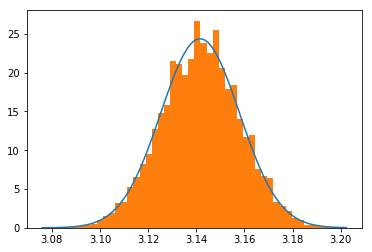

In [9]:
x = np.linspace(min(exp_results), max(exp_results), 100)
plt.plot(x, mlab.normpdf(x, np.pi, pi_stdev))

plt.hist(exp_results, 50, normed=1)
plt.show()

### Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov tests how well a hypothesized distribution function $F(x)$ fits an empirical distribution function $F_n(x)$.
The Kolmogorov-Smirnov test is used to decide if a sample comes from a population with a specific distribution. It gives as output the p-value. If the P value is small, conclude that the two groups were sampled from populations with different distributions. 

In [12]:
# Run the K-S test
from scipy import stats

my_norm = stats.norm(loc=np.mean(exp_results), scale=np.std(exp_results))
                     
def KStest(sample, norm):
    ret = stats.kstest(sample, norm.cdf)
    return ret

KStest(exp_results, my_norm)

KstestResult(statistic=0.01044114716480854, pvalue=0.2256775913648362)